# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import re
import scipy.stats as st

# Import API key
import sys
import os
key = "C:\\Users\\Kelly\\Desktop\\KEYS"
sys.path.append(key)
from OpenWeatherAPI import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [237]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# #I created this section to store the latitude and longitude of my cities for use later in the project.
# latitude = lats.tolist()
# longitude = lngs.tolist()
# city_info = pd.DataFrame(list(zip(cities, latitude, longitude)), 
#                columns =["City Name", "Latitude", "Longitude"]) 

# # Print the city count to confirm sufficient count
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [238]:
# ident = []
# name = []
# weather = []
# clouds = []
# wind = []
# country = []

# #for this section, I created the to_end variable to provide a countdown to the end of the loop, which I found more useful
#     #than counting up as the assignment suggested. I also used an if/else statement print a final statement when the loop
#     #finishes iterating.

# for city in cities:
#     try:
#         query_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"
#         weather_response = requests.get(query_url).json()
#         ident.append(weather_response['id'])
#         name.append(weather_response['name'])
#         weather.append(weather_response['main'])
#         wind.append(weather_response['wind'])
#         clouds.append(weather_response['clouds'])
#         country.append(weather_response['sys']['country'])
#         index = cities.index(city)
#         to_end = (len(cities))-index-1
#         if to_end == 0:
#             print(f'Now processing data for {weather_response["name"]}, , a city in {weather_response["sys"]["country"]}.')
#             print(f'All city data is now processed.')
#         else:
#             print(f'Now processing data for {weather_response["name"]}, a city in {weather_response["sys"]["country"]}. {to_end} more cities to process.')
#     except:
#         print(f'{city} was not found in our dataset, so we will not be collecting data for this city.')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [239]:
rows = zip(ident,name,clouds,wind,weather,country)
with open("city_data.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [266]:
ugly_df = pd.read_csv('city_data.csv', header = None)
ugly_df.columns = ["City ID", "City Name", "Cloudiness", "Wind Speed", "Weather Data", "Country",]

ugly_weather_df = pd.DataFrame(ugly_df["Weather Data"].str.split(',', expand=True).values,
             columns=["Temperature", "Feels Like", "Min Temp", "Max Temp", "Barometric Pressure", "Humidity", "Sea Level", "Ground Level"])
better_df = ugly_df.join(ugly_weather_df).drop(["Weather Data"], axis =1)

better_df["Temperature"] = better_df["Temperature"].str.split().str[-1].str.replace('\W', '').replace('}','',regex=True).astype(float)
better_df["Feels Like"] = better_df["Feels Like"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Min Temp"] = better_df["Min Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Max Temp"] = better_df["Max Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Barometric Pressure"] = better_df["Barometric Pressure"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Humidity"] = better_df["Humidity"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Sea Level"] = better_df["Sea Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Ground Level"] = better_df["Ground Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Wind Speed"] = better_df["Wind Speed"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Cloudiness"] = better_df["Cloudiness"].str.split().str[-1].replace('}','',regex=True).astype(float)

#for some reason, while cleaning my data, the decimal in the Temperature column disappears.I can't figure out why
    #it does this, but the next line of code fixes it.

better_df['Temperature'] = ( better_df['Temperature']/100) 

better_df

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,5106841,Albany,100.0,3.0,US,23.56,16.84,23.00,24.01,1026.0,41.0,NaN,NaN
1,2027316,Ayan,100.0,306.0,RU,5.13,-24.20,-5.13,-5.13,1010.0,90.0,1010.0,998.0
2,964432,Port Alfred,1.0,7.0,ZA,0.63,64.13,63.00,63.00,1017.0,86.0,NaN,NaN
3,3466704,Castro,0.0,317.0,BR,62.89,65.77,62.89,62.89,1014.0,93.0,1014.0,903.0
4,4030556,Rikitea,0.0,33.0,PF,77.92,81.05,77.92,77.92,1017.0,67.0,1017.0,1014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,286621,Salalah,0.0,20.0,OM,7.34,68.05,73.40,73.40,1017.0,46.0,NaN,NaN
542,2070998,Geraldton,0.0,180.0,AU,0.77,68.99,77.00,77.00,1011.0,44.0,NaN,NaN
543,1853174,Sakaiminato,75.0,270.0,JP,36.34,21.63,35.60,37.40,1021.0,80.0,NaN,NaN
544,2873427,Markdorf,100.0,70.0,DE,38.23,33.78,35.60,41.00,1017.0,100.0,NaN,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [241]:
#checking if any cities in my dataframe have humidty > 100%
better_df.sort_values(["Humidity"], ascending=False)


,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
359,2553604,Casablanca,90.0,220.0,MA,54.46,53.96,48.20,60.01,1017.0,100.0,NaN,NaN
398,1224061,Wattegama,20.0,30.0,LK,7.16,78.17,71.60,71.60,1011.0,100.0,NaN,NaN
531,490846,Solotcha,14.0,298.0,RU,0.19,11.64,19.00,19.00,1006.0,100.0,NaN,NaN
365,3129676,Arenillas,40.0,199.0,ES,33.39,19.33,32.00,35.01,1016.0,100.0,1016.0,889.0
512,654440,Kangasala,90.0,160.0,FI,35.87,27.10,35.60,36.00,1008.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2450173,Taoudenni,0.0,49.0,ML,64.89,57.11,64.89,64.89,1014.0,27.0,1014.0,997.0
63,3839307,Rawson,77.0,237.0,AR,70.48,53.31,70.48,70.48,1006.0,26.0,1006.0,1005.0
49,2447513,Arlit,0.0,119.0,NE,66.87,59.23,66.87,66.87,1014.0,25.0,1014.0,965.0
429,236901,Ouadda,24.0,34.0,CF,70.07,63.59,70.07,70.07,1010.0,23.0,1010.0,930.0


In [242]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = better_df.loc[better_df['Humidity'] < 101]
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,5106841,Albany,100.0,3.0,US,23.56,16.84,23.00,24.01,1026.0,41.0,NaN,NaN
1,2027316,Ayan,100.0,306.0,RU,5.13,-24.20,-5.13,-5.13,1010.0,90.0,1010.0,998.0
2,964432,Port Alfred,1.0,7.0,ZA,0.63,64.13,63.00,63.00,1017.0,86.0,NaN,NaN
3,3466704,Castro,0.0,317.0,BR,62.89,65.77,62.89,62.89,1014.0,93.0,1014.0,903.0
4,4030556,Rikitea,0.0,33.0,PF,77.92,81.05,77.92,77.92,1017.0,67.0,1017.0,1014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,286621,Salalah,0.0,20.0,OM,7.34,68.05,73.40,73.40,1017.0,46.0,NaN,NaN
542,2070998,Geraldton,0.0,180.0,AU,0.77,68.99,77.00,77.00,1011.0,44.0,NaN,NaN
543,1853174,Sakaiminato,75.0,270.0,JP,36.34,21.63,35.60,37.40,1021.0,80.0,NaN,NaN
544,2873427,Markdorf,100.0,70.0,DE,38.23,33.78,35.60,41.00,1017.0,100.0,NaN,NaN


In [243]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Accomplished in previous section. While the dataset I had in place at the time I wrote this code did not have any
    #cities with humidity higher than 100%, I can't guarantee that if I were to re-run the code and generate a new
    #list of cities that I wouldn't generate a city with a humidity greater than 100, so I decided to write this
    #section of code anyway.

In [244]:
# clean_city_data = clean_city_data.merge(city_info, on="City Name")
clean_city_data = pd.merge(clean_city_data, city_info,
                        how="left", on=["City Name"])
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude
0,5106841,Albany,100.0,3.0,US,23.56,16.84,23.00,24.01,1026.0,41.0,NaN,NaN,-85.163514,95.948811
1,2027316,Ayan,100.0,306.0,RU,5.13,-24.20,-5.13,-5.13,1010.0,90.0,1010.0,998.0,58.152459,136.429368
2,964432,Port Alfred,1.0,7.0,ZA,0.63,64.13,63.00,63.00,1017.0,86.0,NaN,NaN,-83.112210,47.904390
3,3466704,Castro,0.0,317.0,BR,62.89,65.77,62.89,62.89,1014.0,93.0,1014.0,903.0,-46.959554,-87.603119
4,4030556,Rikitea,0.0,33.0,PF,77.92,81.05,77.92,77.92,1017.0,67.0,1017.0,1014.0,-59.957686,-133.391843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,286621,Salalah,0.0,20.0,OM,7.34,68.05,73.40,73.40,1017.0,46.0,NaN,NaN,-19.847552,-47.312803
542,2070998,Geraldton,0.0,180.0,AU,0.77,68.99,77.00,77.00,1011.0,44.0,NaN,NaN,52.930079,-168.576467
543,1853174,Sakaiminato,75.0,270.0,JP,36.34,21.63,35.60,37.40,1021.0,80.0,NaN,NaN,-20.193303,112.679478
544,2873427,Markdorf,100.0,70.0,DE,38.23,33.78,35.60,41.00,1017.0,100.0,NaN,NaN,-38.794236,120.708837


In [245]:
clean_city_data.to_csv(r'..\VacationPy\clean_city_data.csv') #I added this in after completing WeatherPy so I could use my
    #cleaned dataframe in VacationPy.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [246]:
def printcor(correlation):
    if correlation == 0:
        print(f"There is no linear relationship between the two values.")
    elif correlation == 1:
        print(f"There is a perfect positive linear relationship between the two values.")
    elif correlation == -1:
        print(f"There is a perfect negative linear relationship between the two values.")
    elif 0 < correlation < 0.3:
        print(f"There is a weak positive linear relationship between the two values.")
    elif 0 > correlation > -.3:
        print(f"There is a weak negative relationship between the two values.")
    elif .3 < correlation < .7:
        print(f"There is a moderate positive relationship between the two values.")
    elif -.3 > correlation > -.7:
        print(f"There is a moderate negative relationship between the two values.")
    elif .7 < correlation < 1:
        print(f"There is a strong positive relationship between the two values.")
    elif -.7 > correlation > -1:
        print(f"There is a strong negative relationship between the two values.")

The correlation coefficient for the Latitude and Temperature for these cities is -0.02.
There is a weak negative relationship between the two values.


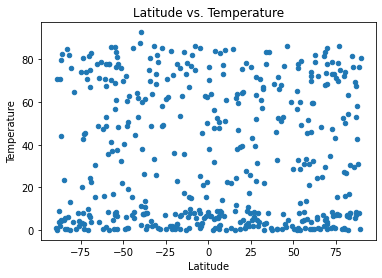

In [247]:
def scatterplot(x,y):
    clean_city_data.dropna()
    "This creates a scatterplot based on the clean_city_data csv using values x and y"
    correlation = clean_city_data[x].corr(clean_city_data[y])
    print(f"The correlation coefficient for the {x} and {y} for these cities is {round(correlation,2)}.")
    clean_city_data.plot.scatter(x, y)
    plt.title(f'{x} vs. {y}')
    plt.savefig(f'WeatherPy_PNG_files/{x}_vs_{y}.png')
    printcor(correlation)
scatterplot("Latitude", "Temperature")

## Latitude vs. Humidity Plot

The correlation coefficient for the Latitude and Humidity for these cities is 0.02.
There is a weak positive linear relationship between the two values.


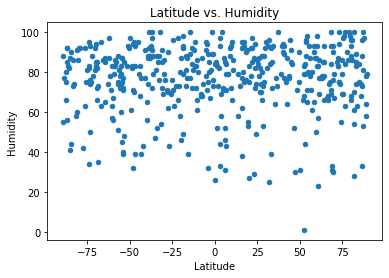

In [248]:
scatterplot("Latitude", "Humidity")

## Latitude vs. Cloudiness Plot

The correlation coefficient for the Latitude and Cloudiness for these cities is 0.03.
There is a weak positive linear relationship between the two values.


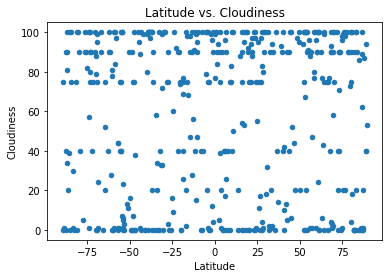

In [249]:
scatterplot("Latitude", "Cloudiness")

## Latitude vs. Wind Speed Plot

The correlation coefficient for the Latitude and Wind Speed for these cities is -0.05.
There is a weak negative relationship between the two values.


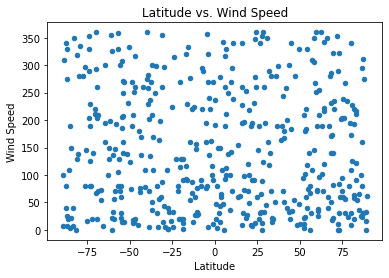

In [250]:
scatterplot("Latitude", "Wind Speed")

## Linear Regression

In [251]:
northern_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
southern_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
test = clean_city_data.loc[clean_city_data['Latitude'] == 0] 
# this line was used to test whether any cities happened to
    # fall on the equator, in which case I might consider adjusting my formula. As they do not, and it's unlikely in other
    #datasets that they would, I'm comfortable leaving the data as-is and treating potential cities with a latitude of 0 as
    #outliers.
test

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [252]:
def nhlinregress(x,y):
    correlation = clean_city_data[x].corr(clean_city_data[y])
    print(f"The correlation coefficient for the {x} and {y} for these cities in the northern hemisphere is {round(correlation,5)}.")
    x_values = northern_hem[x]
    y_values = northern_hem[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y}: Northern Hemisphere')
    plt.savefig(f'WeatherPy_PNG_files/nh_{x}_{y}.png')
    printcor(correlation)
def shlinregress(x,y):
    correlation = clean_city_data[x].corr(clean_city_data[y])
    print(f"The correlation coefficient for the {x} and {y} for these cities in the southern hemisphere is {round(correlation,5)}.")
    x_values = southern_hem[x]
    y_values = southern_hem[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y}: Southern Hemisphere')
    plt.savefig(f'WeatherPy_PNG_files/nh_{x}_{y}.png')
    printcor(correlation)

The correlation coefficient for the Latitude and Max Temp for these cities in the northern hemisphere is 0.01923.
There is a weak positive linear relationship between the two values.


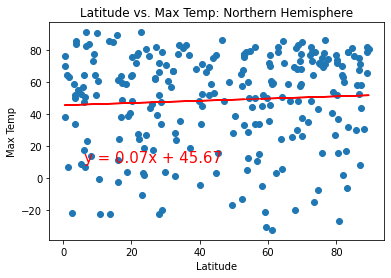

In [253]:
nhlinregress("Latitude", "Max Temp")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient for the Latitude and Max Temp for these cities in the southern hemisphere is 0.01923.
There is a weak positive linear relationship between the two values.


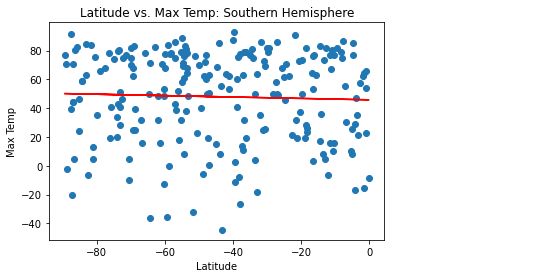

In [254]:
shlinregress("Latitude", "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient for the Humidity and Latitude for these cities in the northern hemisphere is 0.02092.
There is a weak positive linear relationship between the two values.


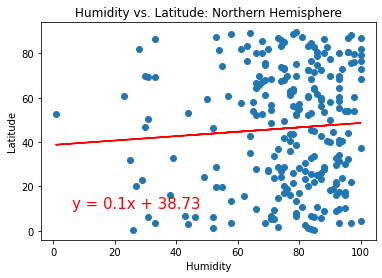

In [255]:
nhlinregress("Humidity", "Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient for the Humidity and Latitude for these cities in the southern hemisphere is 0.02092.
There is a weak positive linear relationship between the two values.


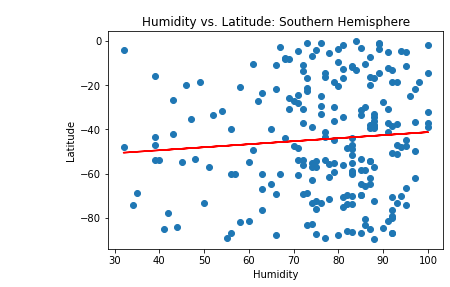

In [256]:
shlinregress("Humidity", "Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient for the Cloudiness and Latitude for these cities in the northern hemisphere is 0.03423.
There is a weak positive linear relationship between the two values.


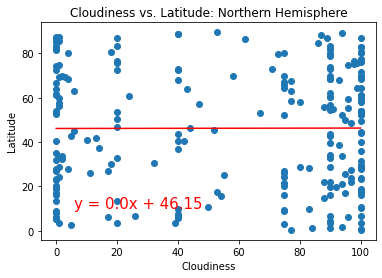

In [257]:
nhlinregress("Cloudiness", "Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient for the Cloudiness and Latitude for these cities in the southern hemisphere is 0.03423.
There is a weak positive linear relationship between the two values.


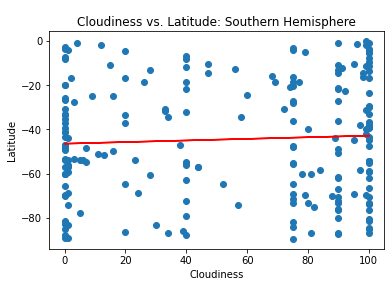

In [258]:
shlinregress("Cloudiness", "Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient for the Wind Speed and Latitude for these cities in the northern hemisphere is -0.04801.
There is a weak negative relationship between the two values.


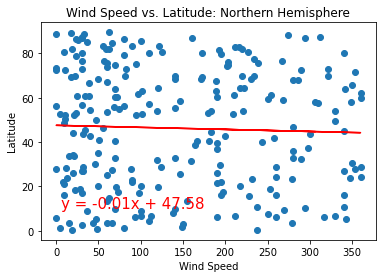

In [259]:
nhlinregress("Wind Speed", "Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient for the Wind Speed and Latitude for these cities in the southern hemisphere is -0.04801.
There is a weak negative relationship between the two values.


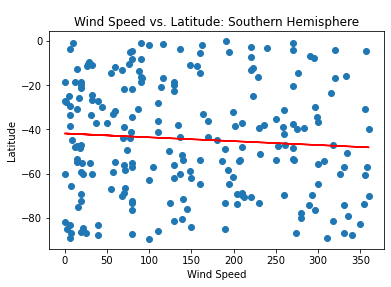

In [260]:
shlinregress("Wind Speed", "Latitude")